                                         |======== Instituto Superior Politécnico Córdoba ========|                
                                         ==                                                      ==
                                         ==  Desarrollo de Sistemas de Inteligencia Artificial   == 
                                         ==                                                      ==
                                         ==  Profesor: Carlos Ignacio Charletti                  ==
                                         ==                                                      ==
                                         ==  Alumno: Medina Jorge Sebastián                      ==
                                         |========================================================|  
                        

<img src="images.jfif">

                   
||---------------------------------------------------||

||-- <font color='blue'> Redes Neuronales con TensorFlow Y Keras</font> --||

||---------------------------------------------------||
  
                    


In [ ]:
Clasificación de Imagenes con Mnist

In [25]:
# El conjunto de prueba esta compuesto por 70.000 imagenes, las cuales 60.000 son para el entrenamiento y 10.000 para el conjunto de pruebas.

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Number of training examples: {len(X_train)}')
print(f'Number of test examples: {len(X_test)}')

Number of training examples: 60000
Number of test examples: 10000


Visualizamos las Imagenes  

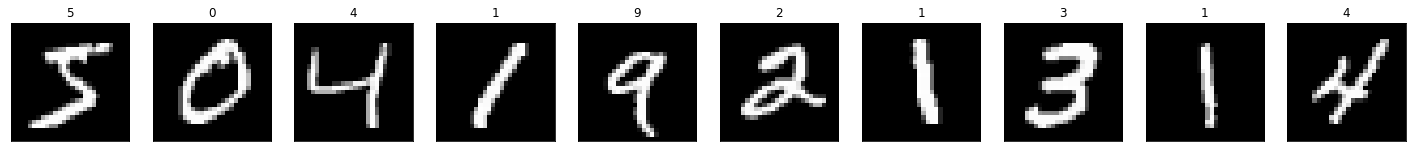

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

SAMPLE_SIZE = 10

# Plot the images in the sample
figure = plt.figure(figsize=(25, 25))

for sample_index in range(SAMPLE_SIZE):
    ax = figure.add_subplot(1, SAMPLE_SIZE, sample_index + 1, xticks=[], yticks=[])
    ax.imshow(X_train[sample_index], cmap='gray')
    ax.set_title(y_train[sample_index])

Detallamos la imagen, para entender lo que la computadora ve, esta imagen en su forma real es una matriz.

La imagen tiene una anchura y altura de 28 pixeles cada una.

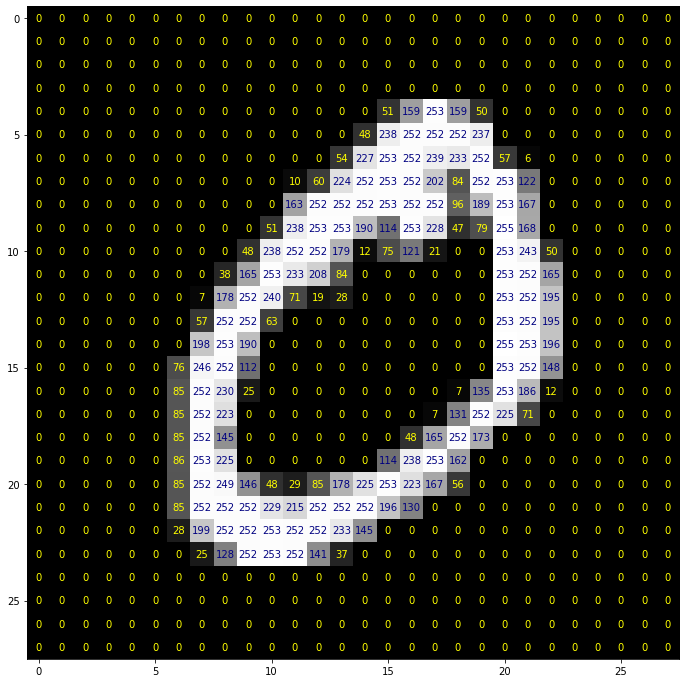

In [27]:
def visualize_input(image, ax):
    ax.imshow(image, cmap='gray')
    width, height = image.shape
    threshold = image.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            pixel_value = image[x][y]
            ax.annotate(f'{round(pixel_value, 2)}', 
                        xy=(y, x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='yellow' if pixel_value < threshold else 'navy')
            
SAMPLE_INDEX = 1            
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(111)
visualize_input(X_train[SAMPLE_INDEX], ax)

In [29]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [30]:
from keras.utils import np_utils

print('Sample of original labels:')
print(y_train[:10])

NUMBER_OF_LABELS = 10
y_train = np_utils.to_categorical(y_train, NUMBER_OF_LABELS)
y_test = np_utils.to_categorical(y_test, NUMBER_OF_LABELS)

print('Sample of one-hot encoded labels:')
print(y_train[:10])

Sample of original labels:
[5 0 4 1 9 2 1 3 1 4]
Sample of one-hot encoded labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Arquitectura del Modelo.

Aqui definimos la red de 3 capas utilizando la API secuencial de Keras.

<img src="FLECHA.gif">

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Definición del Modelo

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUMBER_OF_LABELS, activation='softmax'))

# Resumen del Modelo

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-tr

Compilación del Modelo 

In [39]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [40]:
score = model.evaluate(X_test, y_test)

print(f'Test accuracy: {100 * score[1]}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0635 - accuracy: 0.9815
Test accuracy: 98.15000295639038%


In [34]:
from keras.callbacks import ModelCheckpoint
import os

if not os.path.exists('saved_models'):
    os.mkdir('saved_models')
    
OUTPUT_PATH = 'saved_models/mlp.mnist.best.hdf5'
checkpointer = ModelCheckpoint(filepath=OUTPUT_PATH, save_best_only=True)

BATCH_SIZE = 256
EPOCHS = 10
model_history = model.fit(X_train, 
                          y_train, 
                          batch_size=BATCH_SIZE,
                          validation_split=0.2,
                          epochs=EPOCHS,
                          callbacks=[checkpointer],
                          shuffle=True)

Epoch 1/10
188/188 [==============================] - 4s 20ms/step - loss: 0.3357 - accuracy: 0.9007 - val_loss: 0.1403 - val_accuracy: 0.9582
Epoch 2/10
188/188 [==============================] - 4s 21ms/step - loss: 0.1269 - accuracy: 0.9619 - val_loss: 0.1046 - val_accuracy: 0.9669
Epoch 3/10
188/188 [==============================] - 4s 23ms/step - loss: 0.0853 - accuracy: 0.9744 - val_loss: 0.0880 - val_accuracy: 0.9743
Epoch 4/10
188/188 [==============================] - 4s 23ms/step - loss: 0.0641 - accuracy: 0.9795 - val_loss: 0.0838 - val_accuracy: 0.9754
Epoch 5/10
188/188 [==============================] - 4s 21ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0761 - val_accuracy: 0.9783
Epoch 6/10
188/188 [==============================] - 4s 20ms/step - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0731 - val_accuracy: 0.9799
Epoch 7/10
188/188 [==============================] - 4s 20ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0828 - val_accuracy: 0.9762

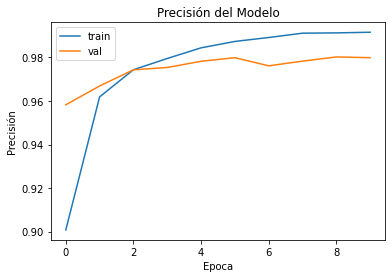

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

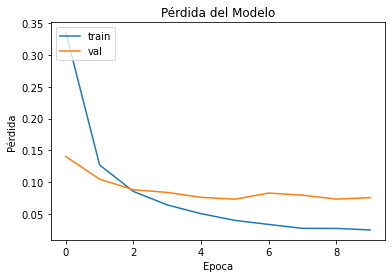

In [36]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Epoca')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
Cargamos el mejor modelo que haya alcnazado la mejor precisión en el conjunto de validación para poder ver su desempeño.

In [41]:
model.load_weights(OUTPUT_PATH)

In [42]:
score = model.evaluate(X_test, y_test)

print(f'Test accuracy: {100 * score[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0635 - accuracy: 0.9815
Test accuracy: 98.15000295639038
